# Apply morphological and image transformation techniques on the attached image to remove noises, adjust etc.
# Share the step by step process/technique you followed for achieving this by doing it in a Notebook. 
# Also share your ideas/approach for doing OCR to extract texts from these kind of images.
# You have to mention the approach and the reason for taking the same.

There are various methods to remove a noice from images some of the techniques are median filtering,
EDE method(edgedetection,dilation,erosion)adaptive filtering etc
but this are the some basic techniques which have only avg accuracy for the output, 
if we create a model with autoencorder neural network we will get better accuracy. but it require better dataset and time for completing.



Here I use some morphological techniques to remove the noise.

steps:
1)convert image to grayscale and apply otsus threshhold.
actualy the threshholding is used for converting an image into binary image,so most frequently this used to select 
areas of interest of an image.

2)perform morphological transforms for smoothening image

3)find contours and filter using contour area.

4)invert image.

In [3]:
#importing necceseery pakages 
import cv2
import numpy as np

#image reading
image = cv2.imread('/home/sreerag-a/Downloads/sample-text.jpg')

#converting our image into grey image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#threshhold is used for converting our image into binary
# If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# So for this purpose, OpenCV has a function, cv2. getStructuringElement(). 
#we just pass the shape and size of the kernel, we get the desired kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))

#Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above.
#Here we use the function, cv2.morphologyEx()
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

#finding contours is like finding white object from black background. So remember, 
#object to be found should be white and background should be black
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    area = cv2.contourArea(c)
    if area < 10:
        cv2.drawContours(opening, [c], -1, (0,0,0), -1)

result = 255 - opening 
# cv2.imshow('thresh', thresh)
# cv2.imshow('opening', opening)
# cv2.imshow('result', result)
cv2.waitKey()
cv2.destroyAllWindows()

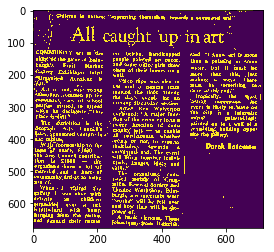

In [6]:
import matplotlib.pyplot as plt
plt.imshow(thresh)
plt.show()

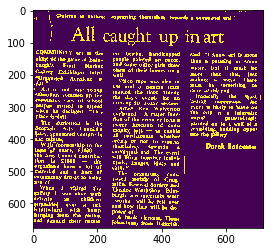

In [7]:
plt.imshow(opening)
plt.show()


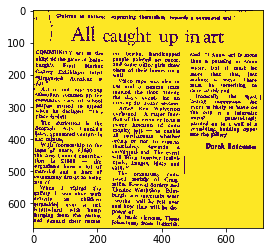

In [8]:
plt.imshow(result)
plt.show()

In [13]:
cv2.imwrite('/home/sreerag-a/Downloads/noice_removed_out.jpg',result)

True